In [105]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [106]:
def compute_h (coordinates):
    ''' This function will compute the homography matrix
        Input: A list of 4 lists following this format [x, y, x', y']
        where x and y are pixel from real world plane
        and x' and y' are the pixel from image plane
        Output: A homograply 3x3 matrix'''

        # Create Ax=b where x is the solution
    A = np.zeros((8, 8))
    b = np.zeros((8, 1))
    for i in range(len(coordinates)):
        A[i][0] = coordinates[i][0]
        A[i][1] = coordinates[i][1]
        A[i][2] = 1
        A[i][3] = 0
        A[i][4] = 0
        A[i][5] = 0
        A[i][6] = -1*coordinates[i][0]*coordinates[i][2]
        A[i][7] = -1*coordinates[i][1]*coordinates[i][2]

        A[i+4][0] = 0
        A[i+4][1] = 0
        A[i+4][2] = 0
        A[i+4][3] = coordinates[i][0]
        A[i+4][4] = coordinates[i][1]
        A[i+4][5] = 1
        A[i+4][6] = -1*coordinates[i][0]*coordinates[i][3]
        A[i+4][7] = -1*coordinates[i][1]*coordinates[i][3]

        b[i][0] = coordinates[i][2]
        b[i+4][0] = coordinates[i][3]
    
    A_inv = np.linalg.pinv(A)
    H = np.dot(A_inv, b)
    H = np.append(H, 1)
    H = H.reshape((3, 3))

    return H

In [318]:
''' Parameter list for all images '''
image_files = [
    {
        'filename': 'Img1.jpg',
        'savename': 'ece661_pics\hw3_task1_1_result.jpg',
        'coordinates': [
            [0, 0, 449, 593],
            [75, 0, 476, 597],
            [0, 85, 448, 629],
            [75, 85,471, 630]]
    },
    {
        'filename': 'Img2.jpeg',
        'savename': 'ece661_pics\hw3_task1_2_result.jpg',
        'coordinates': [
            [475, 564, 0, 0],
            [593, 546, 84, 0],
            [475, 706, 0, 74],
            [594, 720, 84, 74]]
    },
    {
        'filename': 'Img3.jpg',
        'savename': 'ece661_pics\hw3_task1_3_result.jpg',
        'coordinates': [
            [1011, 349, 0, 0],
            [1304, 359, 55, 0],
            [1023, 728, 0, 36],
            [1322, 653, 55, 36]]
    },
    {
        'filename': 'Img4.jpg',
        'savename': 'ece661_pics\hw3_task1_4_result.jpg',
        'coordinates': [
            [723, 240, 0, 0],
            [1471, 186, 13, 0],
            [802, 983, 0, 13],
            [1502, 1005, 13, 13]]
    },
    {
        'filename': 'Img5.jpg',
        'savename': 'ece661_pics\hw3_task1_5_result.jpg',
        'coordinates': [
            [429, 76, 0, 0],
            [1099, 196, 142, 0],
            [513, 923, 0, 107],
            [1127, 701, 142, 107]]
    },
]

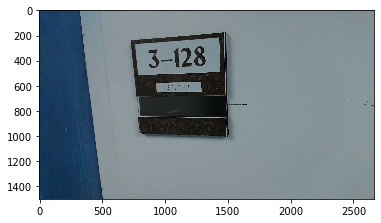

In [349]:
''' Calculate homography matrix and inverse of it '''
image = image_files[3]
source_img = cv.imread(image['filename'])
plt.imshow(source_img)
w = source_img.shape[1]
h = source_img.shape[0]
H = compute_h(image['coordinates'])
H_inv = np.linalg.pinv(H)
H_inv = H_inv / H_inv[2, 2]

In [350]:
''' Parameters for creating result canvas '''
img_p = np.asarray([0, 0, 1])
world_p = np.dot(H, img_p)
world_p = world_p / world_p[2]

img_q = np.asarray([w-1, 0, 1])
world_q = np.dot(H, img_q)
world_q = world_q / world_q[2]

img_r = np.asarray([0, h-1, 1])
world_r = np.dot(H, img_r)
world_r = world_r / world_r[2]

img_s = np.asarray([w-1, h-1, 1])
world_s = np.dot(H, img_s)
world_s = world_s / world_s[2]

min_x = int(min(world_p[0], world_q[0], world_r[0], world_s[0]))
max_x = int(max(world_p[0], world_q[0], world_r[0], world_s[0]))
min_y = int(min(world_p[1], world_q[1], world_r[1], world_s[1]))
max_y = int(max(world_p[1], world_q[1], world_r[1], world_s[1]))

scale1 = source_img.shape[0] / (max_y - min_y)
scale2 = source_img.shape[1] / (max_x - min_x)
scale = max(scale1, scale2)

offset_x = int(min_x) 
offset_y = int(min_y) 

size_x = int((max_x - min_x) * scale)
size_y = int((max_y - min_y) * scale)

result_img = np.zeros((size_y, size_x, 3))

True

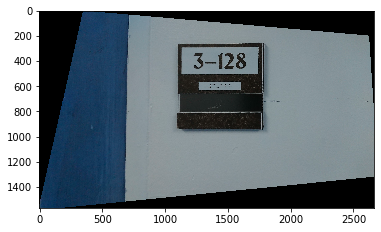

In [351]:
''' Progess to get the result '''
for i in range(result_img.shape[1]):
    for j in range(result_img.shape[0]):
        point = np.asarray([i/scale + offset_x, j/scale + offset_y, 1])
        result_pts = np.dot(H_inv, point)
        result_x = result_pts[0] / result_pts[2]
        result_y = result_pts[1] / result_pts[2]
        if result_x > 0 and result_y > 0 and result_x < w and result_y < h:
            result_img[j][i] = source_img[int(result_y)][int(result_x)]

plt.imshow(result_img.astype(np.int))
cv.imwrite(image['savename'], result_img.astype(np.int))